# Übung 8

**Gruppenname: TSRI**

- Christian Rene Thelen @cortex359
- Leonard Schiel @leo_paticumbum
- Marine Raimbault @Marine Raimbault
- Alexander Ivanets @sandrium

### Hinweise
* Nutzen Sie für die folgenden Aufgaben **nur** die Mittel, die Ihnen Numpy und Matplotlib zur Verfügung stellt.

### In dieser Übung ...

... werden wir uns mit K-Means Clustering vertraut machen. Wir werden K-Means Clustern implementieren (Übung 8.1).

### 8.1 K-Means

In der Vorlesung haben Sie K-Means als eine klassische Clustering-Methode kennengelernt. Sie werden Ihr Wissen über den K-Means Algorithmus durch diese Übung vertiefen. Nutzen Sie für die Implementierung Befehle der Numpy-Bibliothek.

**Ihre Aufgaben**

(1) Schlagen Sie in den Vorlesungsfolien den K-Means Algorithmus nach.

1. Allen Datenpunkten zufällig zu den Klustern $1, \dots, K$ zuordnen.

2. Iteriere, bis die Cluster sich nicht mehr ändern:
    1. Für jeden der $K$ Cluster, berechne den geometrischen Schwerpunkt (centroid). Der Schwerpunkt ist der Featurevektor, der sich aus der Mittelung aller Featurevektoren der dem Cluster zugehörigen Datenpunkte ergibt. $$\bar{x}_{kj} = \frac{1}{|C_k|} \sum_{i\in C_k} x_{i,j}$$
    2. Weise jedem Datenpunkt dem Cluster zu, dessen Schwerpunkt dem Datenpunkt am nächsten liegt (im euklidischem Sinne).

(2) Ich habe Ihnen synthetische Daten zur Übung bereitgestellt. Bitte führen Sie die unten stehende Code-Zelle aus. Sie erzeugt 100 Datenpunkte mit je zwei Features (Merkmalen, Array **X**), organisiert in drei Cluster. Die Clusterzugehörigkeiten sind im Vektor **y** kodiert.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

# generate data
X, y = make_blobs(n_samples=100, n_features=2, centers=3, random_state=1)

(3) [Visualisieren Sie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) die Daten in einem Scatterplot und färben Sie die Cluster gemäß ihrer Clusterzugehörigkeit ein.

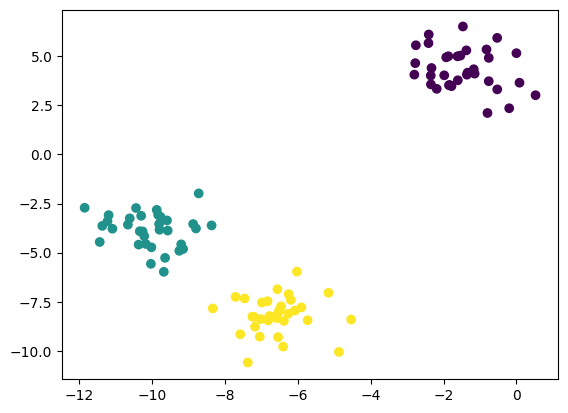

In [2]:
plt.scatter(*X.T, c=y)
plt.show()

(4) Die Anzahl der Cluster sei $K=3$. Implementieren Sie Schritt 1 des K-Means Algorithmus, also die zufällige Zuweisung von Datenpunkten zu den $K$ Clustern. [Dies hier](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) kann Ihnen dabei hilfreich sein.

In [4]:
# Sei C_i die Indexmenge der Datenpunkte aus Cluster i, und i \in [0, K)
K = 3
y_random = np.array([np.random.randint(0, K) for i in range(X.shape[0])])

(5) Visualisieren Sie in einem Scatterplot die Daten und färben Sie die Datenpunkte gemäß Ihrer aus Schritt (4) ermittelten zufälligen Clusterzugehörigkeit ein.

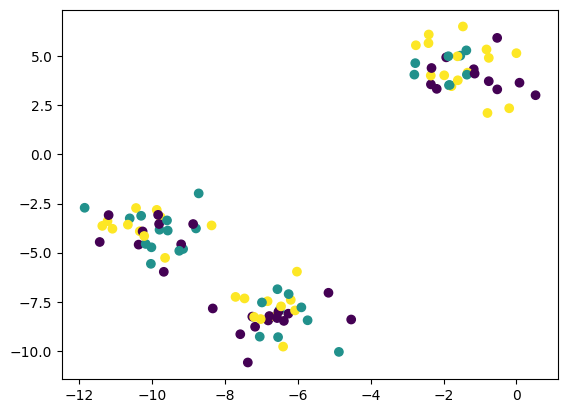

In [5]:
plt.scatter(*X.T, c=y_random)
plt.show()

(6) Implementieren Sie nun die Iterationsschritte 2a und 2b, also die Bestimmung der Clusterzentren (geometrische Schwerpunkte) sowie die Neuzuordnung der Datenpunkte zu demjenigen Cluster, zu dem die Entfernung zum Schwerpunkt des Clusters am kleinsten ist. Nutzen Sie dabei als Distanzmaß den euklidischen Abstand. Eventuell können Ihnen diese Funktionen dabei hilfreich sein: [np.argmin](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html), [np.unique](https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html).
* Prüfen Sie nach Schritt 2b, ob die Zuordnung von Datenpunkten zu Clustern tatsächlich alle Cluster enthält. Falls etwa ein Cluster keine Datenpunkte mehr enthält, starten Sie die Prozedur von Schritt 1 an neu. Wir werden später auf die "Leere-Cluster-Problematik" eingehen.
* Es empfiehlt sich, Ihren Code - sobald er funktioniert - in eine Funktion namens `kmeans` zu schreiben, die die Daten $X$ sowie die Clusteranzahl $K$ entgegennimmt, und das Clusteringergebnis $y_\text{pred}$ ausgibt. Sie können dann im weiteren Verlauf dieser Übung einfach nur noch die Funktion `kmeans` aufrufen.

In [9]:
# Alternative für KMeans++
def initialize_centroids(X: np.ndarray, K: int) -> np.ndarray:
    n_samples, n_features = X.shape
    centroids = np.zeros((K, n_features))

    # Wähle das erste Zentrum zufällig aus den Datenpunkten aus
    centroids[0] = X[np.random.randint(0, n_samples)]

    # Wähle die restlichen K-1 Zentren aus
    for k in range(1, K):
        distances = np.min(distance.cdist(X, centroids[:k], 'euclidean'), axis=1)
        probabilities = distances / np.sum(distances)
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()

        for i, p in enumerate(cumulative_probabilities):
            if r < p:
                centroids[k] = X[i]
                break

    return centroids

In [22]:
from scipy.spatial import distance

def kmeans(X: np.ndarray, K: int, plusplus=False) -> np.ndarray:
    n_samples, n_features = X.shape

    # Schritt 1: Allen Datenpunkten zufällig zu den Klustern $1, \dots, K$ zuordnen.
    if plusplus:
        # Alternative Initialisierung für der Zentren für KMeans++
        centroids = initialize_centroids(X, K)
        y_pred = np.zeros(X.shape[0], dtype=int)
        x_clusterd_prev = np.ones(y_pred.shape) * -1        
    else:
        centroids = np.zeros((K, n_features))
        y_pred = np.random.randint(0, K, size=X.shape[0])
        x_clusterd_prev = np.zeros(y_pred.shape)



    # Schritt 2a: Für jedes Cluster den geometrischen Schwerpunkt bestimmen
    while not np.array_equal(y_pred, x_clusterd_prev):
        print("Step")
        x_clusterd_prev = y_pred.copy()

        for i in range(K):
            # C_i ist die Menge der Datenindizes, welche im Cluster i liegen
            C_i = [x_idx for x_idx in range(len(y_pred)) if y_pred[x_idx] == i]
            #centroids[:, i] = 1 / len(C_i) * np.sum(X[C_i], axis=0)
            if C_i:  # Vermeide Division durch Null, falls ein Cluster leer ist
                centroids[i] = np.mean(X[C_i], axis=0)
            else:
                # Falls ein Cluster leer ist, initialisiere ein neues Zentrum zufällig
                centroids[i] = X[np.random.randint(0, X.shape[0])]

        # Schritt 2b: Jeden Datenpunkt dem nächstgelegenen Cluster zuweisen
        distances = distance.cdist(X, centroids, metric='euclidean')
        y_pred = np.argmin(distances, axis=1)

        # Überprüfe ob die Zuordnung von Datenpunkten zu Clustern tatsächlich alle Cluster enthält
        if np.unique(y_pred).shape[0] != K:
            print("Wiederhole von Schritt 1")
            y_pred = np.random.randint(0, K, size=X.shape[0])

    return y_pred

(7) Führen Sie nun mit Ihrer Implementierung K-Means auf den Daten aus ($K=3$). Visualisieren Sie die Daten in einem Scatterplot und färben Sie sie gemäß der durch K-Means ermittelten Clusterzugehörigkeiten ein. Vergleichen Sie Ihren Plot mit dem aus Schritt (5).

Step
Step
Step
Step


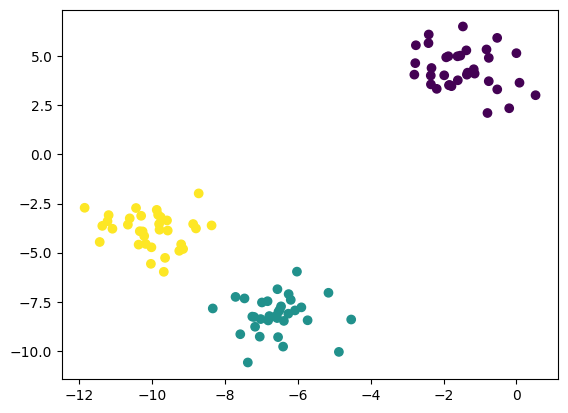

In [33]:
y_pred = kmeans(X, 3, plusplus=True)
plt.scatter(*X.T, c=y_pred)
plt.show()

Sie haben im vorherigen Schritt gesehen, dass Sie mithilfe von K-Means Cluster im Datensatz identifizieren können. Nun geht es darum, Ihre Implementierung abzusichern, sodass Sie leeren Clustern, die während der Iterationen entstehen können, umgehen kann.

(8) Implementieren Sie vor Schritt 2a (also zu Beginn Ihrer Iteration) ein Verfahren, das überprüft, ob es Cluster gibt, die keine Datenpunkte enthalten. In diesem Falle wählen Sie einen zufälligen Datenpunkt aus und weisen ihn dem leeren Cluster zu. Dieser [Befehl](https://www.w3schools.com/python/ref_set_difference.asp) könnte Ihnen bei diesem Unterfangen hilfreich sein.

* Wie kann es dazu kommen, dass wir während der Iteration leere Cluster erhalten? Schauen Sie sich zur Erklärung das [hier](http://user.ceng.metu.edu.tr/~tcan/ceng465_f1314/Schedule/KMeansEmpty.html) verlinkte Beispiel an.
* Wenn Sie Schritt (8) fertig bearbeitet haben, entfernen Sie einfach den Neustart-Mechanismus, den Sie in Schritt (6) implementiert hatten. Sie brauchen diesen nicht mehr.

Fällt während einer Iteration der Schwerpunkt des Clusters $C_i$ so zwischen zwei umliegende Cluster $C_a$ und $C_b$, dass alle Elemente $i \in C_i$ bei der nächsten Iteration eine geringere euklidische Distanz zu den Cluster Schwerpunkten $C_a$ und $C_b$ haben, dann _zerreißt_ das Cluster $C_i$ und wird leer.

In [34]:
from scipy.spatial import distance
import random

def kmeans(X: np.ndarray, K: int, plusplus=False) -> tuple[np.ndarray, np.ndarray]:
    n_samples, n_features = X.shape

    assert n_samples > K, "Es können nicht mehr Cluster als Datenpunkte gebildet werden"

    # Schritt 1:
    if plusplus:
        # Alternative Initialisierung für der Zentren für KMeans++
        centroids = initialize_centroids(X, K)
        y_pred = np.zeros(n_samples, dtype=int)
        x_clusterd_prev = np.ones(y_pred.shape) * -1
    else:
        # Allen Datenpunkten zufällig zu den Klustern $1, \dots, K$ zuordnen.
        centroids = np.zeros((K, n_features))
        y_pred = np.random.randint(0, K, size=n_samples)
        x_clusterd_prev = np.zeros(y_pred.shape)
        
    while not np.array_equal(y_pred, x_clusterd_prev):
        x_clusterd_prev = y_pred.copy()

        # Überprüfe, ob einzelne Cluster leer sind
        if np.unique(y_pred).shape[0] != K:
            # Da auch mehrere Cluster leer sein können, müssen wir hier durch alle leeren Cluster iterieren.
            empty_clusters = set(range(K)).difference(y_pred)
            # print(f"Leere(s) Cluster {empty_clusters} gefunden.")
            # um sicherzustellen, dass nicht zufällig mehrfach der gleiche Datenpunkt ausgewählt wird
            replaced_idxs = set()
            for ec in empty_clusters:
                random_idx = random.choice(list(set(range(y_pred.shape[0])).difference(replaced_idxs)))
                replaced_idxs.add(random_idx)
                y_pred[random_idx] = ec

        # Schritt 2a: Für jedes Cluster den geometrischen Schwerpunkt bestimmen
        for i in range(K):
            # X_i ist die Menge der Daten, welche im Cluster i liegen
            X_i = X[y_pred == i]
            if len(X_i) > 0:
                centroids[i] = np.mean(X_i, axis=0)

        # Schritt 2b: Jeden Datenpunkt dem nächstgelegenen Cluster zuweisen
        distances = distance.cdist(X, centroids, metric='euclidean')
        y_pred = np.argmin(distances, axis=1)

    return y_pred, centroids

(9) Ermitteln Sie Cluster für $K=2, 3, 4, 5$ und visualisieren Sie sie (wie in Schritt 7) in Scatterplots. Was fällt Ihnen auf? (1-3 Sätze)

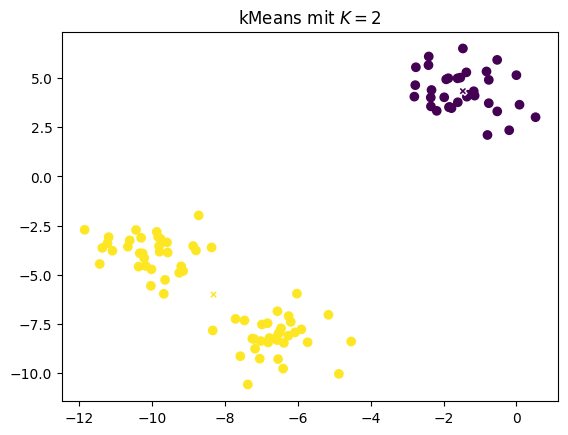

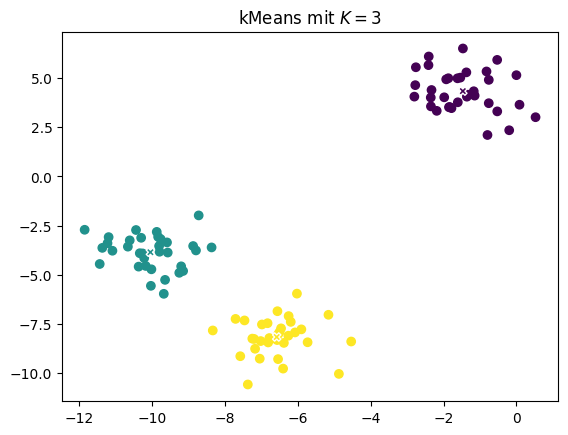

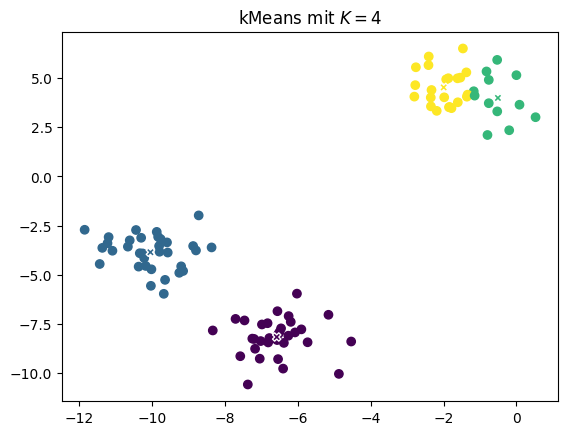

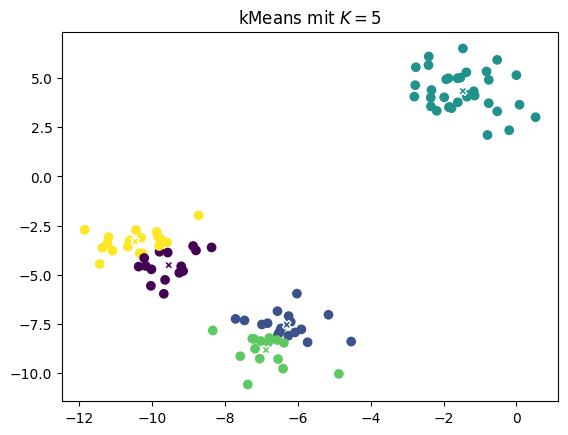

In [35]:
for K in 2, 3, 4, 5:
    x_clusterd_new, x_centroids = kmeans(X, K)
    plt.title(f"kMeans mit $K={K}$")
    plt.scatter(X[:, 0], X[:, 1], c=x_clusterd_new)
    plt.scatter(x_centroids[:, 0], x_centroids[:, 1], c=range(K), edgecolors='white', marker="X")
    plt.show()

Die Bildung von 2 oder 3 Clustern erscheint noch sinnvoll, während für $K>3$ die Unterteilung willkürlich erscheint. 

(10) Ermitteln Sie für den unten erzeugten Datensatz mithilfe von K-Means $K=2$ Cluster und visualisieren Sie das Clusterergebnis (vergessen Sie nicht, die Punkte gemäß ihrer Clusterzugehörigkeit einzufärben).

In [131]:
from sklearn.datasets import make_moons
[X2, y2] = make_moons(random_state=1)

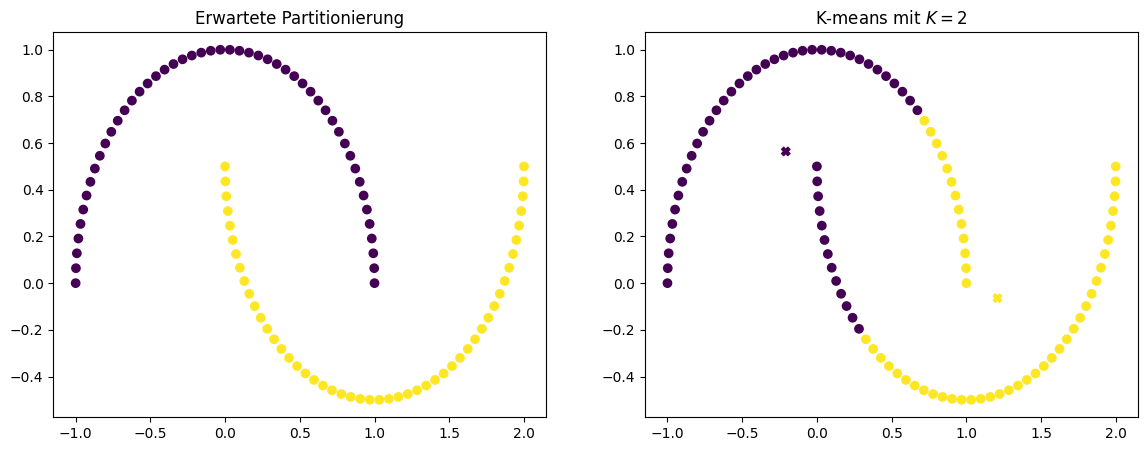

In [132]:
y2_pred, y2_centroids = kmeans(X2, 2)

plt.subplots(1, 2, figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.title("Erwartete Partitionierung")
plt.scatter(X2[:, 0], X2[:, 1], c=y2)

plt.subplot(1, 2, 2)
plt.title(f"K-means mit $K=2$")
plt.scatter(X2[:, 0], X2[:, 1], c=y2_pred)
plt.scatter(y2_centroids[:, 0], y2_centroids[:, 1], c=range(2), marker="X")
plt.show()

(11) Erklären Sie, warum Sie im vorherigen Schritt nicht die Cluster erhalten, wie Sie sie für die Daten erwarten würden. Mit welchem anderen Clusteransatz könnten Sie eventuell die korrekten Cluster ermitteln? (3-6 Sätze).

Wir verwenden den euklidischen Abstand zu den Centroids mit K-means als _dissimilarity measure_, jedoch lassen sich die Daten damit nicht gut ohne vorherige Transformation partionieren. Für eine korrekte Partionierung sollte hier der Abstand zwischen den einzelnen Datenpunkten zu ihren Nachbarn eine größere Rolle spielen als ihr Abstand zu den Cluster Schwerpunkten. Um bei diesem Datensatz Cluster zu bilden, bei denen die unmittelbare Distanz zu anliegenden Datenpunkten entscheidender sein soll, als der Abstand zu einem gemeinsamen Schwerpunkt, könnte eine **Featuretransformation** oder eine **hierarchische Clusteranalyse** vielleicht hilfreicher sein.    

(Einschub) agglomeratives hierarchisches Clustern (HCA) mit der quadratischen Distanz als dissimilarity measure. 

In [107]:
### Ansätze dies mit NumPy zu lösen…

dist_sq: np.ndarray = np.sum((cluster[:, np.newaxis] - cluster[np.newaxis, :]) ** 2, axis=-1)

# Ignorieren der Diagonalen
np.fill_diagonal(dist_sq, np.inf)

# Finde den Index des kleinsten Elements in der flachen Version der Matrix
flat_index = np.argmin(dist_sq)

# Verwandle den flachen Index in Zeilen- und Spaltenindizes
row, col = np.unravel_index(flat_index, dist_sq.shape)

print(f"Der kleinste Wert befindet sich bei Index ({row}, {col})")

Der kleinste Wert befindet sich bei Index (34, 57)


In [108]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(X2, 'single')

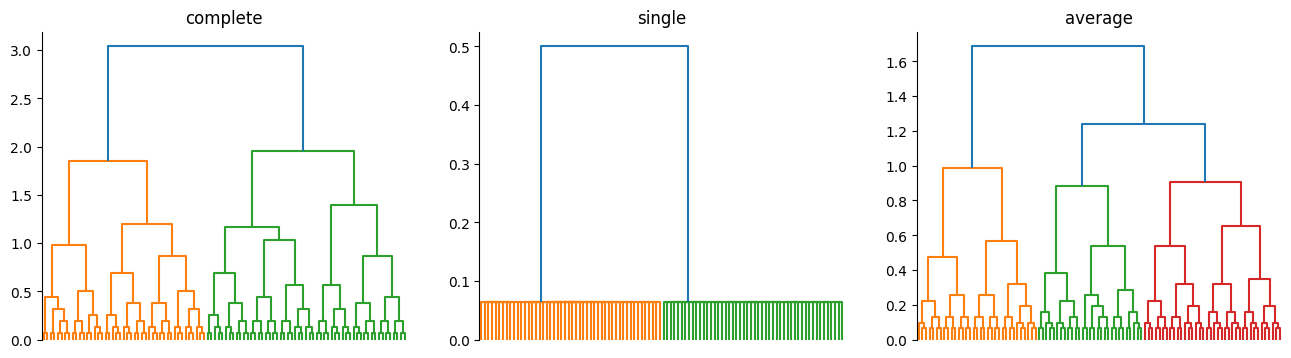

In [120]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

for i, m in enumerate(['complete', 'single', 'average']):
    Z = hierarchy.linkage(X2, m)
    hierarchy.dendrogram(Z, truncate_mode='none', show_leaf_counts=True, no_labels=True, ax=axs[i])

    axs[i].set_title(m)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)

plt.show()

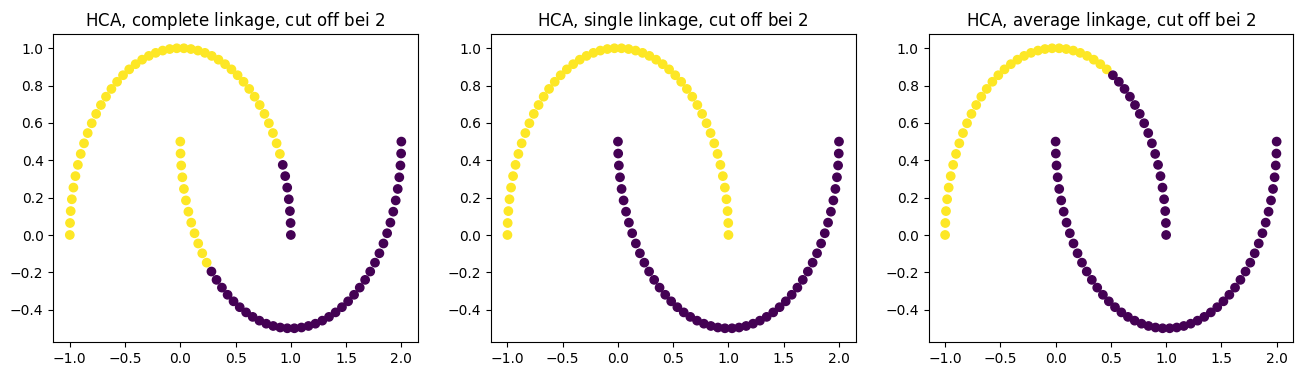

In [119]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

for i, m in enumerate(['complete', 'single', 'average']):
    y2_hca_pred = hierarchy.cut_tree(hierarchy.linkage(X2, m), n_clusters=2)
    axs[i].set_title(f"HCA, {m} linkage, cut off bei $2$")
    axs[i].scatter(*X2.T, c=y2_hca_pred)

plt.show()

(12) \[Optional\] Schlagen Sie in den Vorlesungsfolien nach, wie die summierte Intra-Cluster-Variation $\sum_{k=1}^K W(C_k)$ definiert ist. Implementieren Sie eine Funktion `icv`, die die Daten $X$ sowie die Clusterzugehörigkeit $y$ entgegennimmt und Ihnen die summierte Intra-Cluster-Variation zurückgibt.

Die **Intra-Cluster-Variation** $W(C_k)$ des Clusters $C_k$ ist die Summe der quadratischen euklidischen Distanzen zwischen allen Datenpunkten.

$$\begin{aligned}
    W(C_k) &= \frac{1}{|C_K|} \sum_{i, i'\in C_K} \sum^p_{j=1} (x_{ij} - x_{i'j})^2 \\
    & = 2 \sum_{i \in C_K} \sum^{p}_{j=1} (x_{ij} - \bar{x}_{kj})^2
\end{aligned}$$

mit Centroid: 
$$
\bar{x}_{kj} = \frac{1}{|C_{K}|} \sum_{i \in C_{K}} x_{ij}
$$

Das Clustering ist gut, wenn die Intra-Cluster-Variation minimiert werden wird, also wir Cluster haben, in denen der euklidische Abstand zwsichen den Datenpunkten möglichst klein ist.

In [133]:
from scipy.spatial import distance

def icv(X: np.ndarray, y:np.ndarray) -> float:
    summed_intra_cluster_variation = 0
    # äußere Summe, iteriere über alle Klassen k
    for k in np.unique(y):
        # Erstelle alle x_ij und x_i'j paare
        X_k = X[y == k]
        # innere Summe, Differenzenquadrate und Mittelwert
        distances = distance.cdist(X_k, X_k, metric='euclidean')
        intra_cluster_variation = np.sum(distances ** 2) / float(X_k.shape[0])
        summed_intra_cluster_variation += intra_cluster_variation
    return summed_intra_cluster_variation

print(f"icv = {icv(X2, y2_pred)}")

icv = 80.07819322206497


(13) \[Optional\] Sie wissen aus der Vorlesung, dass K-Means Clustering-Ergebnisse liefern kann, die lokalen Minima in der Intra-Cluster-Variation entsprechen. Das erzielte Clustering hängt von der zufälligen Initialisierung der Clusterzugehörigkeiten in Schritt 1 des Algorithmus ab. Wir wollen nun erreichen, dass Ihre Implementierung von kmeans mehrfache ($n=20$) Clustering-Versuche mit unterschiedlichen zufälligen initialen Clusterzugehörigkeiten unternimmt und das Clustering mit der niedrigsten Intra-Cluster-Variation zurückliefert. Ändern Sie dementsprechend Ihre Funktion ab und implementieren Sie diese Funktionalität.

In [134]:
def repeated_kmeans(X: np.ndarray, K: int, repeats=20) -> tuple[float, np.ndarray, np.ndarray]:
    best_icv: float = float('inf')
    for i in range(repeats):
        y, centroids = kmeans(X, K)
        y_icv = icv(X, y)
        if y_icv < best_icv:
            best_icv, best_y, best_centroids = y_icv, y, centroids
    return best_icv, best_y, best_centroids

repeated_kmeans(X2, 8, 200)

(np.float64(10.461054974366206),
 array([1, 1, 0, 1, 4, 7, 0, 1, 5, 5, 4, 6, 2, 2, 2, 0, 0, 6, 1, 3, 3, 5,
        4, 5, 7, 0, 4, 0, 6, 6, 5, 4, 2, 4, 4, 6, 6, 2, 7, 0, 1, 2, 1, 7,
        1, 6, 6, 4, 0, 4, 6, 2, 7, 3, 2, 6, 7, 4, 3, 1, 0, 5, 5, 6, 6, 4,
        3, 2, 3, 4, 2, 7, 2, 5, 3, 4, 7, 5, 1, 7, 0, 0, 3, 7, 7, 2, 0, 3,
        5, 1, 3, 7, 5, 1, 3, 1, 3, 5, 3, 6]),
 array([[-0.36614247,  0.90437898],
        [ 1.33551216, -0.41169492],
        [ 0.08435023,  0.16303242],
        [ 0.90047281,  0.36456104],
        [ 1.90047281,  0.13543896],
        [ 0.57666605, -0.37906201],
        [-0.90047281,  0.36456104],
        [ 0.36614247,  0.90437898]]))

(14) \[Optional\] Bestimmen Sie mit Ihrer Funktion `icv` aus Schritt (12) die Intra-Cluster-Variation für $K=1, \ldots 8$ und tragen Sie diese Größe gegen $K$ in einem Plot auf.

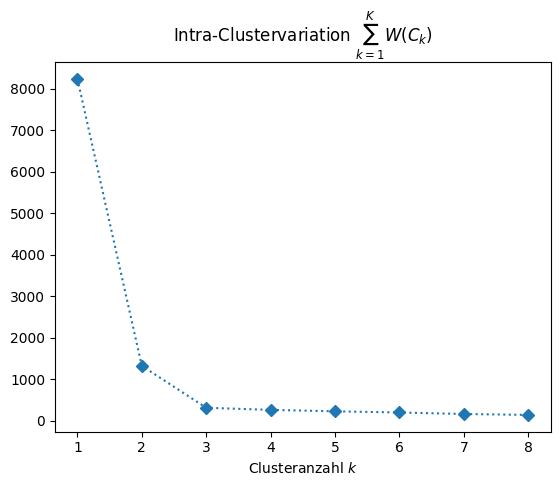

In [135]:
icvs: list[float] = []
for K in range(1, 8+1):
    icv_k, _, _ = repeated_kmeans(X, K, 20)
    icvs.append(icv_k)

plt.title("Intra-Clustervariation $\\sum_{k=1}^K W(C_k)$")
plt.plot(range(1, 8+1), icvs, 'D:')
plt.xlabel("Clusteranzahl $k$")
plt.show()

(15) \[Optional\] Die "korrekte" Anzahl an Clustern (sofern es sie überhaupt gibt) ist notorisch schwierig zu bestimmen und Methoden, diese zu bestimmen, ist aktueller Forschungsgegenstand. Ein pragmatischer Ansatz ist es, sich die Intra-Cluster-Variation (ICV) als Funktion der Clusteranzahl $K$ zu plotten und das $K$ auszuwählen, zu dem die ICV gerade stark abgesunken ist. Betrachten Sie dazu Ihren Plot aus Schritt (14): Gibt es ein $K$, ab der die summierte Intra-Cluster-Variation stark sinkt? Geben Sie diesen Wert für $K$ an. Ist dieser Wert Ihrer Meinung nach sinnvoll?

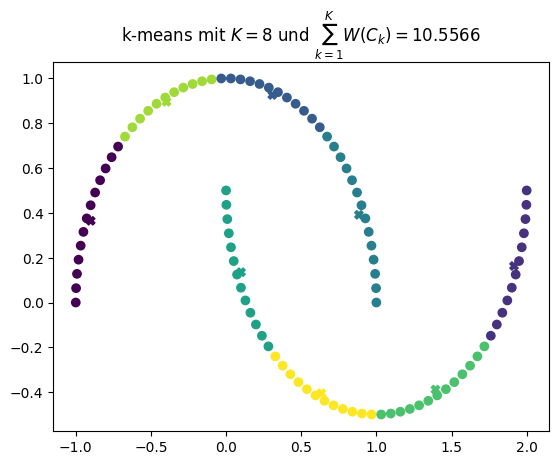

In [142]:
K2 = 8
X2_icv, X2_clusterd, X2_centroids = repeated_kmeans(X2, K2, 30)
plt.title(f"k-means mit $K={K2}$ und $\\sum_" + "{k=1}^K" + f"W(C_k)= {X2_icv:.4f}$")
plt.scatter(*X2.T, c=X2_clusterd)
plt.scatter(*X2_centroids.T, c=range(K2), marker="X")
plt.show()

Der ICV-Wert ist sowohl beim Übergang von $K=1$ auf $K=2$, als auch vom Übergang von $K=2$ auf $K=3$ stark abgesunken. Daher könnte man $K=2$ oder $K=3$ wählen.
Möchte man jedoch die ICV generell einfach minimieren, wäre ein höheres $K$ zu wählen.

Damit darf ich Ihnen gratulieren. Sie haben das K-Means-Clusteringverfahren intensiv durchdrungen. K-Means wird Ihnen in Data Science und Machine Learning Projekten oft begegnen.  

### 8.2 Bildkompression (mittels K-Means)

In dieser Übung werden Sie lernen, wie Sie mithilfe von K-Means ein einfaches Verfahren etablieren können, um Bilder zu komprimieren. 

**Das Verfahren:**

1. Sie starten mit einem Foto in 16 Millionen Farben (24 Bit). Die Farbe jedes Pixels wird durch einen Rot-, Grün- und Blauanteil kodiert (jeweils 8 Bit) und besteht daher aus einem Featurevektor der Länge 3.
2. Mithilfe von K-Means finden Sie in diesen Featurevektoren 16 Cluster und ihre 16 Clusterzentren.
3. Die Bildinformation lässt sich nun mithilfe der 16 Cluster sowie ihrer Clusterzentren darstellen. Für die Kodierung der Clusteridentität reichen 4 Bits ($2^4=16$ Cluster). Die assoziierten 16 verschiedenen Vektoren der Clusterzentren werden ebenfalls gespeichert.


**Ihre Daten**

- Foto: [https://data.bialonski.de/ds/eichhorn.png](https://data.bialonski.de/ds/eichhorn.png)

**Ihre Aufgaben**



(1) [Importieren](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html) Sie die Daten in das Array `im`. Welche Dimensionen hat das Array? In welchen Dimensionen wird was kodiert?

In [143]:
im = plt.imread("eichhorn.png")
im.shape

(128, 128, 3)

Die 128x128 Pixel des Bildes haben je einen Rot, Grün und Blau Wert.

(2) [Visualisieren](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) Sie die Daten im Array `im`.

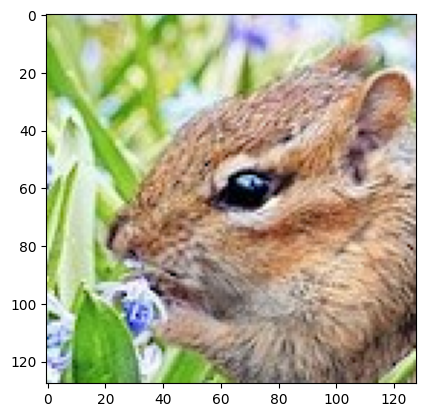

In [144]:
plt.imshow(im)
plt.show()

(3) Transformieren Sie das Array `im` in ein neues Array `X` mit neuem *Shape*, sodass dieses Array nur noch 2 Dimensionen aufweist: In den Zeilen stehen die Datenpunkte (Pixel) und in den Spalten die Farbkodierung.

In [145]:
im = im.reshape((im.shape[0] * im.shape[1], im.shape[2]))
im.shape

(16384, 3)

(4) Wenden Sie Ihren K-Means Algorithmus aus Übung 8.1 an, um 16 Cluster im Array `X` zu finden. Geben Sie außerdem auch die assoziierten Clusterzentren zurück.

* **Wichtig:** Wenn Sie Schwierigkeiten mit Ihrer Implementierung von K-Means haben, dann können Sie auch die Implementierung von [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) benutzen.

In [146]:
im_pred, im_centroids = kmeans(im, 16)

(5) Wir erstellen nun das Foto in seiner komprimierten Form, um es in einem späteren Schritt visualisieren zu können. Dazu müssen wir ein Array erstellen, wo jedes Pixel nicht mehr durch seinen ursprünglichen Rot-, Grün-, Blau-Vektor dargestellt wird, sondern durch den assoziierten Clusterzentrumsvektor. Jedes Pixel wurde über K-Means einem von 16 Clustern und damit auch einem von 16 Clusterzentrumsvektoren zugeordnet.

* Erstellen Sie ein Array `Z` mit denselben Dimensionen wie `X`, wo Sie allerdings die Features (die Farbkodierung) durch die jeweiligen Clusterzentrumsvektoren ersetzt haben.

In [148]:
Z: np.ndarray = np.zeros(im.shape)
for i, k in enumerate(im_pred):
    Z[i, :] = im_centroids[k, :]

(6) Geben Sie dem Array `Z` wieder die Form (Shape), die dem ursprünglichen Array `X` entspricht und visualisieren Sie dieses Array als Bild (siehe Schritt (2)).

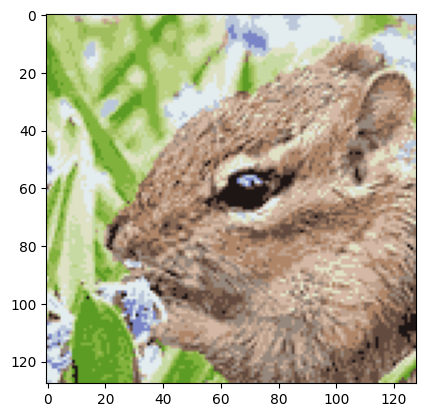

In [149]:
plt.imshow(Z.reshape((128, 128, 3)))
plt.show()

(7) Vergleichen Sie die Bilder aus Schritt (2) und Schritt (6): Sehen Sie große Qualitätsunterschiede?

Der Qualitätsunterschied ist bemerkbar, aber außerordentlich gering, wenn man bedenkt, dass nur noch 16 geschickt gewählte Farben in dem Bild vorkommen.

(8) \[Optional\] Wie viele Bytes benötigen Sie zum Speichern des ursprünglichen Bildes? Wie viele Bytes benötigen Sie, wenn Sie das Foto komprimiert mit K-Means abspeichern? Berechnen Sie die zu erwartenden Werte und geben Sie sie an.

In [150]:
print(np.size(im), np.size(im)*4, im.dtype)

49152 196608 float32


Das ursprüngliche Bild wurde mit $128^2 \cdot 3$ Farbwerten kodiert, welche als `float32` (also mit 4 Byte pro Farbwert) gespeichert wurden. $$49152 \cdot 4\ \text{Byte} \approx 196.6\ \text{kByte}$$

In der komprimierten Form gibt es nur noch $16$ verschiedene Farbwerte, zu deren Unterscheidung lediglich $4\ \text{bit}$ benötigt werden. $$49152 \cdot 4\ \text{bit} \approx 24.58\ \text{kByte}$$
Zusätzlich müssen allerdings noch die $16$ Centroids abgespeichert werden, da diese für jedes Bild einzigartig sind. $$16\cdot 3\cdot 4\ \text{Byte} = 192\ \text{Byte}$$

Damit liegt der Speicherbedarf für das Bild nach Kompression bei $24.768\ \text{kByte}$, was fast $\frac{1}{8}$ der ursprünglichen Größe ist.